In [1]:
# usual imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


The following definitions have been taken from the Kaggle Competition Description:
https://www.kaggle.com/c/microsoft-malware-prediction/data

Unavailable or self-documenting column names are marked with an "NA".

- MachineIdentifier - Individual machine ID
- ProductName - Defender state information e.g. win8defender
- EngineVersion - Defender state information e.g. 1.1.12603.0
- AppVersion - Defender state information e.g. 4.9.10586.0
- AvSigVersion - Defender state information e.g. 1.217.1014.0
- IsBeta - Defender state information e.g. false
- RtpStateBitfield - NA
- IsSxsPassiveMode - NA
- DefaultBrowsersIdentifier - ID for the machine's default browser
- AVProductStatesIdentifier - ID for the specific configuration of a user's antivirus software
- AVProductsInstalled - NA
- AVProductsEnabled - NA
- HasTpm - True if machine has tpm
- CountryIdentifier - ID for the country the machine is located in
- CityIdentifier - ID for the city the machine is located in
- OrganizationIdentifier - ID for the organization the machine belongs in, organization ID is mapped to both specific companies and broad industries
- GeoNameIdentifier - ID for the geographic region a machine is located in
- LocaleEnglishNameIdentifier - English name of Locale ID of the current user
- Platform - Calculates platform name (of OS related properties and processor property)
- Processor - This is the process architecture of the installed operating system
- OsVer - Version of the current operating system
- OsBuild - Build of the current operating system
- OsSuite - Product suite mask for the current operating system.
- OsPlatformSubRelease - Returns the OS Platform sub-release (Windows Vista, Windows 7, Windows 8, TH1, TH2)
- OsBuildLab - Build lab that generated the current OS. Example: 9600.17630.amd64fre.winblue_r7.150109-2022
- SkuEdition - The goal of this feature is to use the Product Type defined in the MSDN to map to a 'SKU-Edition' name that is useful in population reporting. The valid Product Type are defined in %sdxroot%\data\windowseditions.xml. This API has been used since Vista and Server 2008, so there are many Product Types that do not apply to Windows 10. The 'SKU-Edition' is a string value that is in one of three classes of results. The design must hand each class.
- IsProtected - This is a calculated field derived from the Spynet Report's AV Products field. Returns: a. TRUE if there is at least one active and up-to-date antivirus product running on this machine. b. FALSE if there is no active AV product on this machine, or if the AV is active, but is not receiving the latest updates. c. null if there are no Anti Virus Products in the report. Returns: Whether a machine is protected.
- AutoSampleOptIn - This is the SubmitSamplesConsent value passed in from the service, available on CAMP 9+
- PuaMode - Pua Enabled mode from the service
- SMode - This field is set to true when the device is known to be in 'S Mode', as in, Windows 10 S mode, where only Microsoft Store apps can be installed
- IeVerIdentifier - NA
- SmartScreen - This is the SmartScreen enabled string value from registry. This is obtained by checking in order, HKLM\SOFTWARE\Policies\Microsoft\Windows\System\SmartScreenEnabled and HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Explorer\SmartScreenEnabled. If the value exists but is blank, the value "ExistsNotSet" is sent in telemetry.
- Firewall - This attribute is true (1) for Windows 8.1 and above if windows firewall is enabled, as reported by the service.
- UacLuaenable - This attribute reports whether or not the "administrator in Admin Approval Mode" user type is disabled or enabled in UAC. The value reported is obtained by reading the regkey HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Policies\System\EnableLUA.
- Census_MDC2FormFactor - A grouping based on a combination of Device Census level hardware characteristics. The logic used to define Form Factor is rooted in business and industry standards and aligns with how people think about their device. (Examples: Smartphone, Small Tablet, All in One, Convertible...)
- Census_DeviceFamily - AKA DeviceClass. Indicates the type of device that an edition of the OS is intended for. Example values: Windows.Desktop, Windows.Mobile, and iOS.Phone
- Census_OEMNameIdentifier - NA
- Census_OEMModelIdentifier - NA
- Census_ProcessorCoreCount - Number of logical cores in the processor
- Census_ProcessorManufacturerIdentifier - NA
- Census_ProcessorModelIdentifier - NA
- Census_ProcessorClass - A classification of processors into high/medium/low. Initially used for Pricing Level SKU. No longer maintained and updated
- Census_PrimaryDiskTotalCapacity - Amount of disk space on primary disk of the machine in MB
- Census_PrimaryDiskTypeName - Friendly name of Primary Disk Type - HDD or SSD
- Census_SystemVolumeTotalCapacity - The size of the partition that the System volume is installed on in MB
- Census_HasOpticalDiskDrive - True indicates that the machine has an optical disk drive (CD/DVD)
- Census_TotalPhysicalRAM - Retrieves the physical RAM in MB
- Census_ChassisTypeName - Retrieves a numeric representation of what type of chassis the machine has. A value of 0 means xx
- Census_InternalPrimaryDiagonalDisplaySizeInInches - Retrieves the physical diagonal length in inches of the primary display
- Census_InternalPrimaryDisplayResolutionHorizontal - Retrieves the number of pixels in the horizontal direction of the internal display.
- Census_InternalPrimaryDisplayResolutionVertical - Retrieves the number of pixels in the vertical direction of the internal display
- Census_PowerPlatformRoleName - Indicates the OEM preferred power management profile. This value helps identify the basic form factor of the device
- Census_InternalBatteryType - NA
- Census_InternalBatteryNumberOfCharges - NA
- Census_OSVersion - Numeric OS version Example - 10.0.10130.0
- Census_OSArchitecture - Architecture on which the OS is based. Derived from OSVersionFull. Example - amd64
- Census_OSBranch - Branch of the OS extracted from the OsVersionFull. Example - OsBranch = fbl_partner_eeap where OsVersion = 6.4.9813.0.amd64fre.fbl_partner_eeap.140810-0005
- Census_OSBuildNumber - OS Build number extracted from the OsVersionFull. Example - OsBuildNumber = 10512 or 10240
- Census_OSBuildRevision - OS Build revision extracted from the OsVersionFull. Example - OsBuildRevision = 1000 or 16458
- Census_OSEdition - Edition of the current OS. Sourced from HKLM\Software\Microsoft\Windows NT\CurrentVersion@EditionID in registry. Example: Enterprise
- Census_OSSkuName - OS edition friendly name (currently Windows only)
- Census_OSInstallTypeName - Friendly description of what install was used on the machine i.e. clean
- Census_OSInstallLanguageIdentifier - NA
- Census_OSUILocaleIdentifier - NA
- Census_OSWUAutoUpdateOptionsName - Friendly name of the WindowsUpdate auto-update settings on the machine.
- Census_IsPortableOperatingSystem - Indicates whether OS is booted up and running via Windows-To-Go on a USB stick.
- Census_GenuineStateName - Friendly name of OSGenuineStateID. 0 = Genuine
- Census_ActivationChannel - Retail license key or Volume license key for a machine.
- Census_IsFlightingInternal - NA
- Census_IsFlightsDisabled - Indicates if the machine is participating in flighting.
- Census_FlightRing - The ring that the device user would like to receive flights for. This might be different from the ring of the OS which is currently installed if the user changes the ring after getting a flight from a different ring.
- Census_ThresholdOptIn - NA
- Census_FirmwareManufacturerIdentifier - NA
- Census_FirmwareVersionIdentifier - NA
- Census_IsSecureBootEnabled - Indicates if Secure Boot mode is enabled.
- Census_IsWIMBootEnabled - NA
- Census_IsVirtualDevice - Identifies a Virtual Machine (machine learning model)
- Census_IsTouchEnabled - Is this a touch device ?
- Census_IsPenCapable - Is the device capable of pen input ?
- Census_IsAlwaysOnAlwaysConnectedCapable - Retreives information about whether the battery enables the device to be AlwaysOnAlwaysConnected .
- Wdft_IsGamer - Indicates whether the device is a gamer device or not based on its hardware combination.
- Wdft_RegionIdentifier - NA

In [ ]:
# Notebooks which have been considered in the following analyisis are as follows:
# [1] https://www.kaggle.com/dimitreoliveira/malware-detection-eda-and-lgbm
# [2] https://www.kaggle.com/dimitreoliveira/malware-detection-extended-eda
# [3] https://www.kaggle.com/jiegeng94/everyone-do-this-at-the-beginning
# [4] 

In [3]:
# In order to optimize memory usage it is useful to make certain features get certain types
# the dictionary below has been taken from https://www.kaggle.com/theoviel/load-the-totality-of-the-data
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float32',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int16',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float64', # was 'float32'
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float32', # was 'float16'
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float32', # was 'float16'
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float64', # was 'float32'
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float64', # was 'float32'
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float32', # was 'float16'
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float32', # was 'float16'
        'Census_InternalPrimaryDisplayResolutionVertical':      'float32', # was 'float16'
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float64', # was 'float32'
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [4]:
malware = pd.read_csv('/content/gdrive/My Drive/Notebooks Colab/train.csv', dtype=dtypes)

In [11]:
malware_test = pd.read_csv('/content/gdrive/My Drive/Notebooks Colab/test.csv', dtype=dtypes)

In [5]:
malware.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,...,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,...,HDD,299451.0,0,4096.0,Desktop,18.9,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,...,HDD,102385.0,0,4096.0,Notebook,13.9,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4909.0,317701.0,4.0,5.0,...,SSD,113907.0,0,4096.0,Desktop,21.5,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,...,UNKNOWN,227116.0,0,4096.0,MiniTower,18.5,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,355.0,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417e

In [13]:
# Let's determine the type of each feature
# Easiest to do for binary types:

bins = [col for col in malware.columns if malware[col].nunique()==2]

# Now it is tricky to distinguish between the numerical and categorical data - 
# a lot of categorical features have numerical values so we need to distinguish them by inspection?
# According to [1], the following are true numericals:

nums = ['Census_ProcessorCoreCount',
        'Census_PrimaryDiskTotalCapacity',
        'Census_SystemVolumeTotalCapacity',
        'Census_TotalPhysicalRAM',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches',
        'Census_InternalPrimaryDisplayResolutionHorizontal',
        'Census_InternalPrimaryDisplayResolutionVertical',
        'Census_InternalBatteryNumberOfCharges']

cats = [col for col in malware.columns if col not in bins if col not in nums]
feature_dict = [['Binary Features', len(bins)], ["Numerical Features", len(nums)], 
               ["Categorical Features", len(cats)]]
categories = pd.DataFrame(feature_dict, columns=['Feature Type', 'Feature Count'])

In [ ]:
len(cats) + len(bins) + len(nums)

83

<AxesSubplot:xlabel='Feature Count', ylabel='Feature Type'>

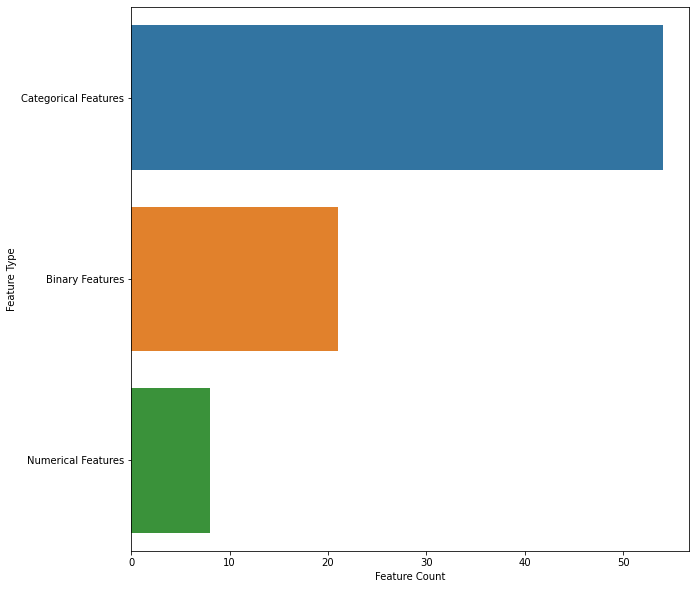

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(data = categories.sort_values(by = 'Feature Count', ascending = False),
            x = "Feature Count", y = "Feature Type")
# as noted in the presentation, most of the features are categorical

In [ ]:
# are all rows distinct?
len(malware) == malware['MachineIdentifier'].nunique()

True

In [ ]:
# Look for missing data:
# calculate the percentage of missing values in each column
missing_data = (malware.isnull().sum()/malware.shape[0]).sort_values(ascending = False)

In [ ]:
print(f"There are {len(missing_data[missing_data == 0])} columns with no missing data.")
print(f"There are {len(missing_data[missing_data != 0])} columns with some data missing.")
# we see that more than 50% of the features have some missing data

There are 39 columns with no missing data.
There are 44 columns with some data missing.


PuaMode                                  0.999741
Census_ProcessorClass                    0.995894
DefaultBrowsersIdentifier                0.951416
Census_IsFlightingInternal               0.830440
Census_InternalBatteryType               0.710468
Census_ThresholdOptIn                    0.635245
Census_IsWIMBootEnabled                  0.634390
SmartScreen                              0.356108
OrganizationIdentifier                   0.308415
SMode                                    0.060277
CityIdentifier                           0.036475
Wdft_IsGamer                             0.034014
Wdft_RegionIdentifier                    0.034014
Census_InternalBatteryNumberOfCharges    0.030124
Census_FirmwareManufacturerIdentifier    0.020541
Census_IsFlightsDisabled                 0.017993
Census_FirmwareVersionIdentifier         0.017949
Census_OEMModelIdentifier                0.011459
Census_OEMNameIdentifier                 0.010702
Firewall                                 0.010239


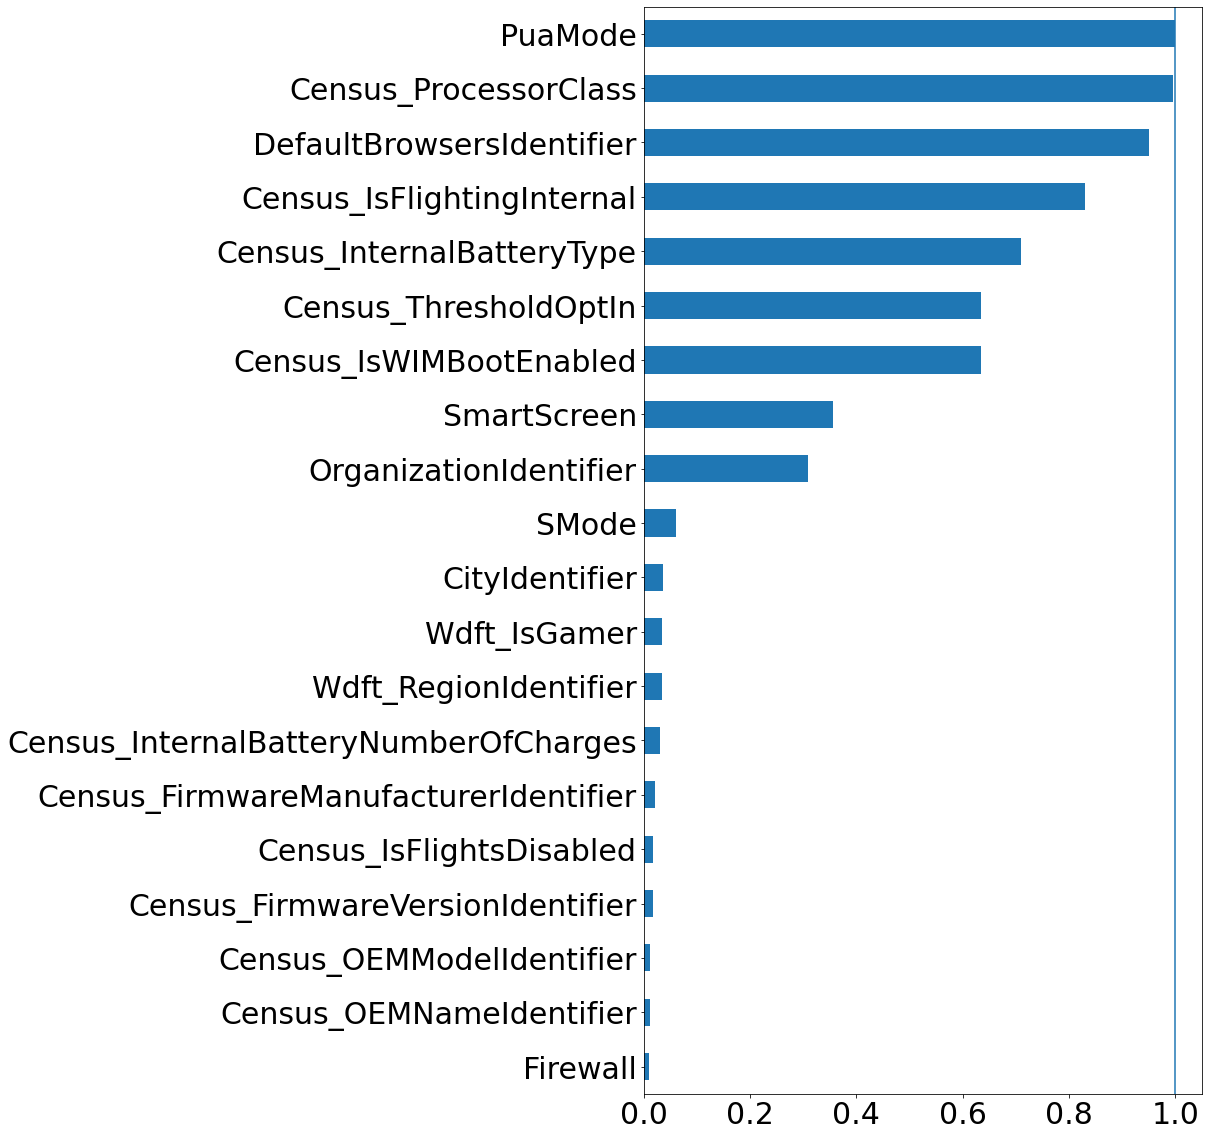

In [ ]:
# get the first 20 columns with the highest % of missing values
missing_data.head(20).sort_values().plot(kind = "barh", figsize = (10,20), fontsize = 30)
# add a horizontal line for clearer comparison
plt.vlines(x = 1, ymin = -1, ymax = len(missing_data))

#plt.xlabel(size = 100)
missing_data.head(20)

We have three columns with over 95% missing data. These are:
- **PuaMode** -  Pua Enabled mode from the service (PUA are Potentially Unwanted Applications). By default in Windows 10 (version 2004 and later), Microsoft Defender Antivirus blocks apps that 
are considered PUA, for Enterprise (E5) devices.
- **Census_ProcessorClass** - Census_ProcessorClass - A classification of processors into high/medium/low. Initially used for Pricing Level SKU. No longer maintained and updated.
- **DefaultBrowsersIdentifier** - ID for the machine's default browser.

It seems that while these could potentially be important in our analysis, the fact that there are so many missing values simply disqualifies them for further consideration?

In [ ]:
for feat in list(missing_data.head(3).index):
    print(malware[feat].value_counts())
    print(malware[feat].nunique())
    print("\n")
    
#  --- MISSING DATA (>95%) ----

# NUCLEAR OPTION: ANNIHILATE ALL
# to_drop = list(missing_data.head(3).index)
# malware.drop(to_drop, inplace=True, axis=1)
    
# OPTION A: PULLING THE TRIGGER FOR SELECTED FEATURES
# This seems like a good choice for the PuaMode and Census_ProcessorClass? 
# to_drop = ['PuaMode', 'Census_ProcessorClass']
# malware.drop(labels = to_drop, axis=1, inplace = True)

# OPTION B: FIXING?
# 'DefaultBrowsersIdentifier' are denoted with numbers. Would it make sense to use some number for
# the missing data that we will qualify as "OTHER" or "UNKNOWN"? People who care about browsers
# may behave safer on the web etc.
# malware["DefaultBrowsersIdentifier"].fillna(777, inplace = True)

on       2307
audit       2
Name: PuaMode, dtype: int64
2


mid     20914
low      9621
high     6096
Name: Census_ProcessorClass, dtype: int64
3


239.0     46056
3195.0    42692
1632.0    28751
3176.0    24220
146.0     20756
          ...  
873.0         1
2729.0        1
440.0         1
197.0         1
61.0          1
Name: DefaultBrowsersIdentifier, Length: 2017, dtype: int64
2017




The italic text in the brackets next to the features are the definitions from Kaggle

6 columns have roughly more than a third of the data missing. These are:
- **Census_IsFlightingInternal** (*NA*, 83% missing) - what do they mean by flighting?? No idea what it represents
- **Census_InternalBatteryType** (*NA*, 71% missing) - can battery type be important? 
- **Census_ThresholdOptIn** (*NA*, 64% missing) - I don't know what that is
- **Census_IsWIMBootEnabled** (*NA*, 63% missing) - something system-boot related? I don't know
- **SmartScreen** (*This is the SmartScreen enabled string value from registry. This is obtained by checking in order, HKLM\SOFTWARE\Policies\Microsoft\Windows\System\SmartScreenEnabled and HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Explorer\SmartScreenEnabled. If the value exists but is blank, the value "ExistsNotSet" is sent in telemetry*, 36% missing) - 
- **OrganizationIdentifier** (*ID for the organization the machine belongs in, organization ID is mapped to both specific companies and broad industries*, 31% missing) - this may be important as some organizations might be a more common target of malware attacks due to the nature of their businesses, however we cannot really 'fill' those values with random values or deduce them? Would need to encode them as "OTHER" or "UNKNOWN"

A lot of notebooks on this copetition throw away features with >70% missing data

In [ ]:
for feat in list(missing_data.iloc[3:9].index):
    print(malware[feat].value_counts())
    print(malware[feat].nunique())
    print("\n")

# NUCLEAR OPTION: ANNIHILATE ALL
# to_drop = list(missing_data.iloc[3:9].index)
# malware.drop(to_drop, inplace=True, axis=1)

# for 'SmartScreen', we see that some categories are doubled becasue of sloppiness - this could be fixed
# and another class denoting 'UNKNOWN'/'OTHER' could be added?
# screen_fix = {"Off", "Prompt", "Warn", "RequireAdmin", "On", }

0.0    1512703
1.0         21
Name: Census_IsFlightingInternal, dtype: int64
2


lion    2028256
li-i     245617
#        183998
lip       62099
liio      32635
         ...   
˙˙˙          1
lgl0          1
l            1
@i          1
lÿÿÿ          1
Name: Census_InternalBatteryType, Length: 78, dtype: int64
78


0.0    3253342
1.0        816
Name: Census_ThresholdOptIn, dtype: int64
2


0.0    3261779
1.0          1
Name: Census_IsWIMBootEnabled, dtype: int64
2


RequireAdmin    4316183
ExistsNotSet    1046183
Off              186553
Warn             135483
Prompt            34533
Block             22533
off                1350
On                  731
&#x02;              416
&#x01;              335
on                  147
requireadmin         10
OFF                   4
0                     3
Promt                 2
Enabled               1
prompt                1
warn                  1
00000000              1
requireAdmin          1
&#x03;                1
Name: SmartScreen, dt

In [ ]:
# Another thing we might want too look at is to consider the cardinality of the data
cardinals = pd.DataFrame([[col, malware[col].nunique()] for col in cats if col != 'MachineIdentifier'],
                          columns = ['Feature', 'Cardinality'])

<AxesSubplot:ylabel='Feature'>

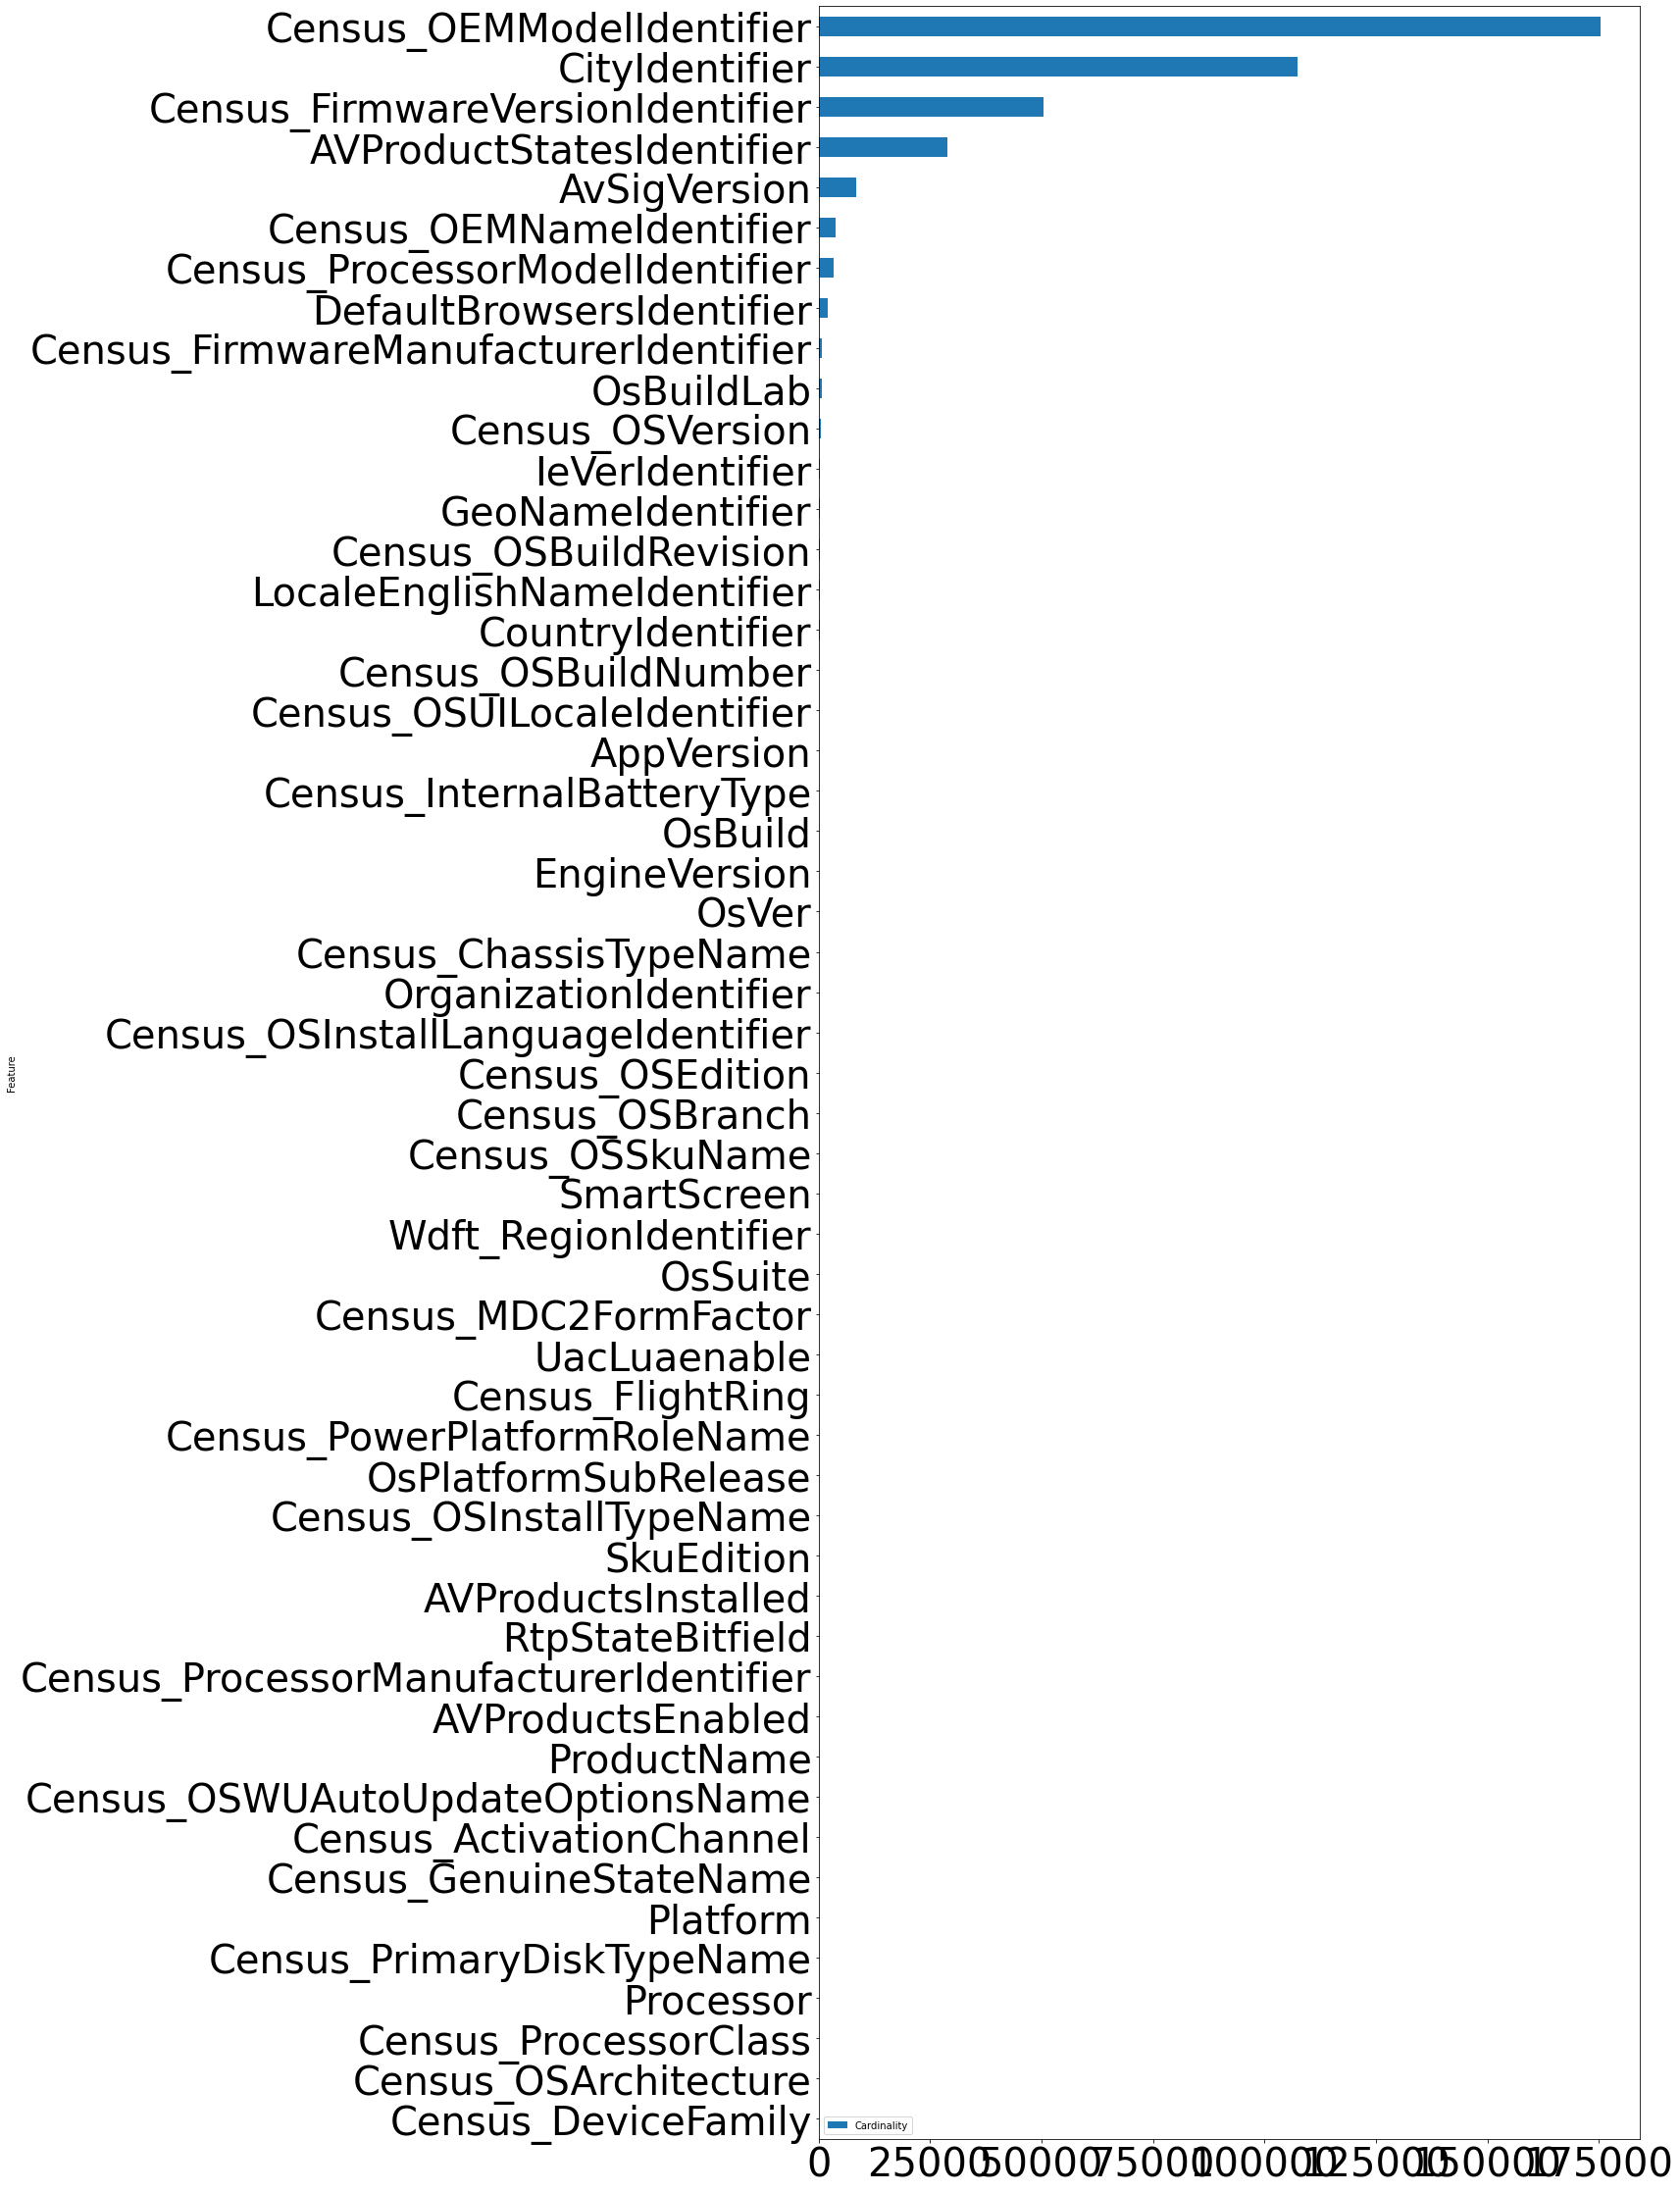

In [ ]:
cardinals['Cardinality'] = cardinals['Cardinality'].astype(float)
cardinals.sort_values(by = "Cardinality", ascending = True).plot(kind = 'barh', x = "Feature",
                                               y = "Cardinality",
                                               figsize = (15,40), fontsize = 40)

In [ ]:
cardinals.sort_values(by = "Cardinality", ascending = True)

,Feature,Cardinality
26,Census_DeviceFamily,3.0
37,Census_OSArchitecture,3.0
31,Census_ProcessorClass,3.0
15,Processor,3.0
32,Census_PrimaryDiskTypeName,4.0
14,Platform,4.0
47,Census_GenuineStateName,5.0
48,Census_ActivationChannel,6.0
46,Census_OSWUAutoUpdateOptionsName,6.0
0,ProductName,6.0


In [ ]:
# In categorical features, consider whether there is a majority class which 'dominates' 
# over the whole columns - this includes both binary and non-binary categorical features

domination = pd.DataFrame(
    data = [[col, malware[col].value_counts(normalize = True).values[0], 
             malware[col].nunique()] for col in malware.columns if col not in nums], 
    columns = ['Feature', 'domination of main class', "Cardinality"]
)

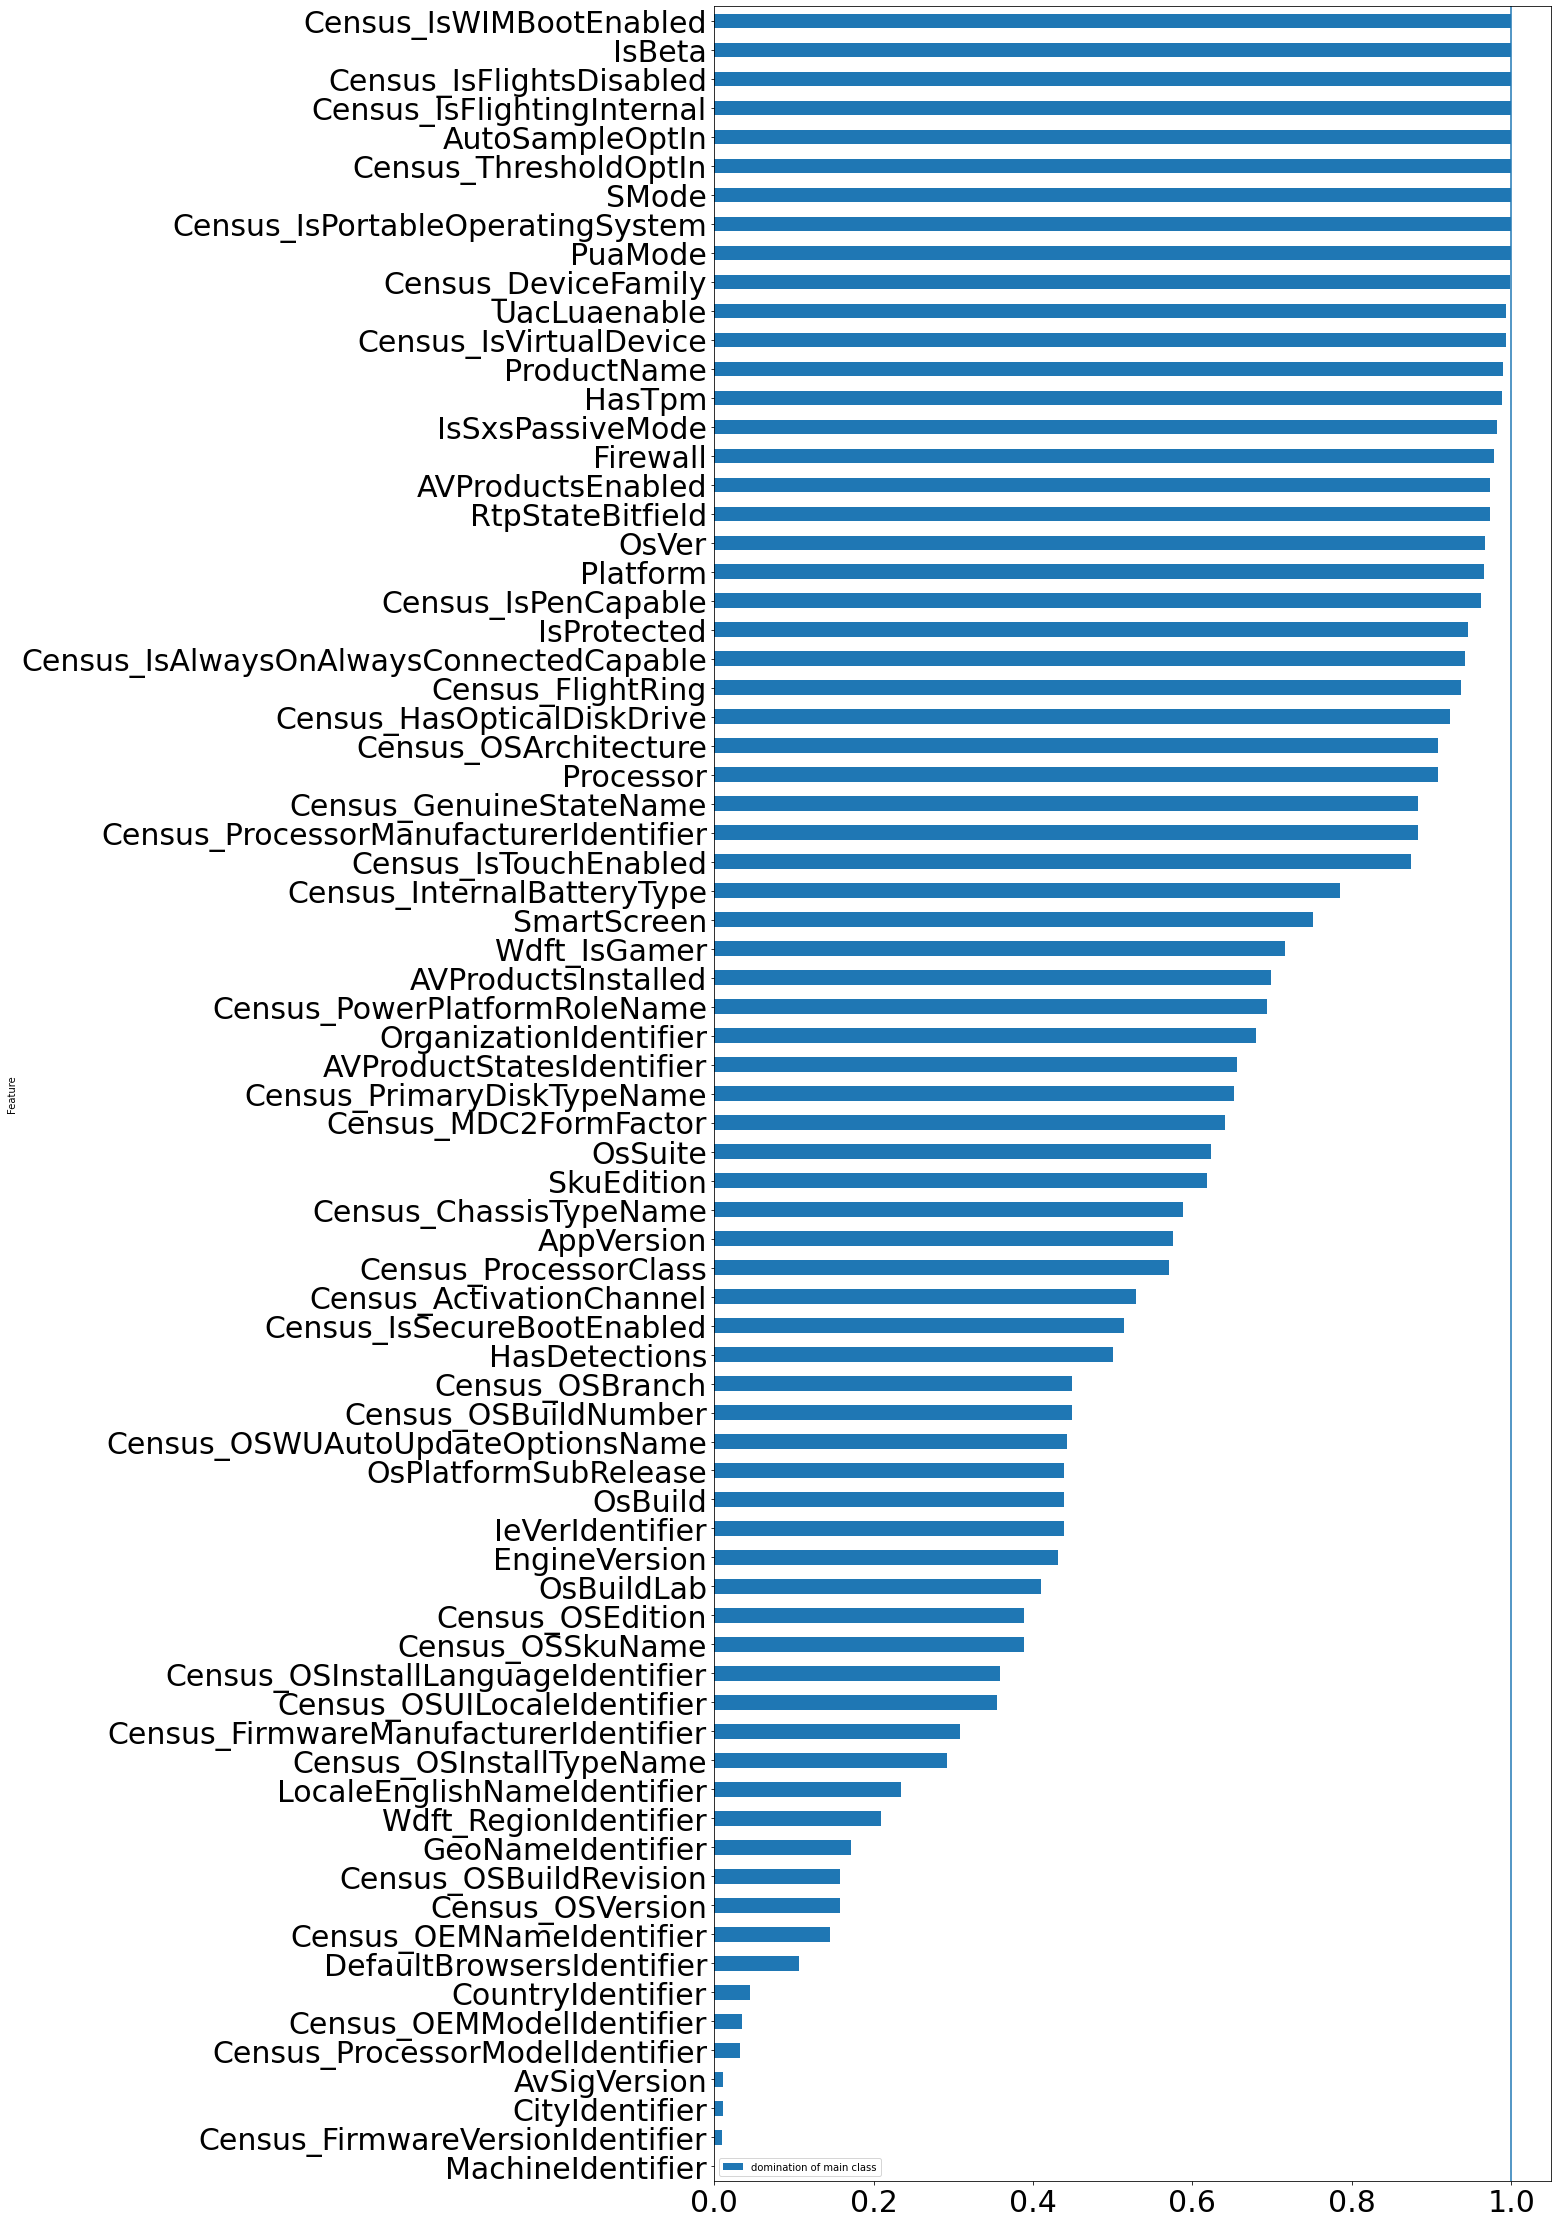

In [ ]:
domination.sort_values(by = "domination of main class", ascending = True).plot(kind = 'barh', x = "Feature",
                                               y = "domination of main class",
                                               figsize = (15,40), fontsize = 30)
# add a horizontal line for clearer comparison
plt.vlines(x = 1, ymin = -1, ymax = len(domination))


# some guys on Kaggle remove features with >98% majority class dominance
# for both binaries and non-binaries 

So the possible bad aspects of our training dataset are:
- some columns with missing parts of data
- columns with big variety of categories
- some columns with a very dominant one type of class (majority category covers more than >90% of occurences[3] - skeweness?)

However, it is also important to consider how the training set is related to the test set (or is it? thanks Rodrigo for the insight):

In [ ]:
#####################################
######## QUESTIONABLE PART ##########
#####################################

'''
card_test = pd.DataFrame(
    data = [[col, 
             malware[col].nunique(),
             malware_test[col].nunique()] for col in cats if col != "MachineIdentifier"],
    columns = ['Feature', "Card. Train", "Card. Test"]
)

card_test['Abs. % Difference'] = 100*abs((card_test['Card. Train']-card_test['Card. Test'])/card_test['Card. Train'])
card_test.sort_values(by="Abs. % Difference", ascending = False)

# we see that some features have different classes in the train and test sets
# some have more classes in the train, some have more classes in the test 
# this seems important but what can we do about it?
'''

,Feature,Card. Train,Card. Test,Abs. % Difference
7,AVProductsInstalled,8,6,25.000000
16,OsVer,58,44,24.137931
35,Census_InternalBatteryType,78,63,19.230769
6,AVProductStatesIdentifier,28970,23492,18.909216
4,RtpStateBitfield,7,8,14.285714
5,DefaultBrowsersIdentifier,2017,1757,12.890431
49,Census_FlightRing,10,11,10.000000
3,AvSigVersion,8531,9357,9.682335
38,Census_OSBranch,32,29,9.375000
41,Census_OSEdition,33,36,9.090909


In [ ]:
##################################################################################
###################### FURTHER IDEAS FOR REMOVING COLUMNS ########################
##################################################################################
#
# - We have Country/City/GeoName Identifiers - Contry has NO missing values
#   while City/GeoName have some (~3% and <0.1%). Surely GeoName can be tossed away because
#   a given country obviously corresponds to a particular geographical region... What about 
#   cities? 
# - The ID column is to be dropped in the end of course
# - more ideas

<AxesSubplot:xlabel='HasDetections', ylabel='count'>

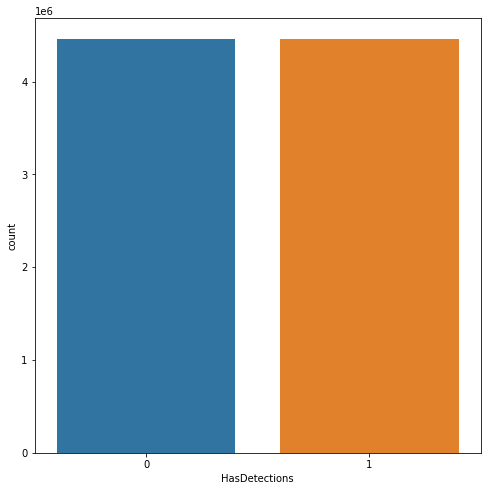

In [ ]:
# Is our dataset balanced for training?
plt.figure(figsize = (8,8))
sns.countplot(data = malware, x = "HasDetections")
# there is almost a 50:50 split of PWNED and non-PWNED machine, which is good

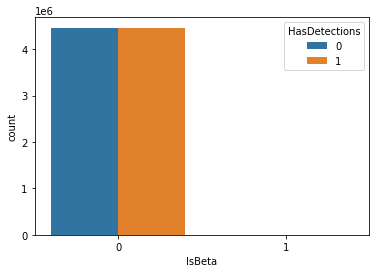

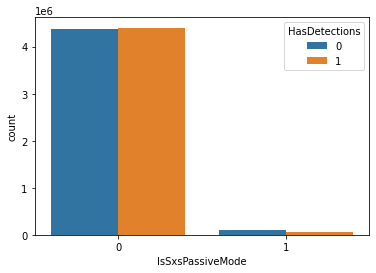

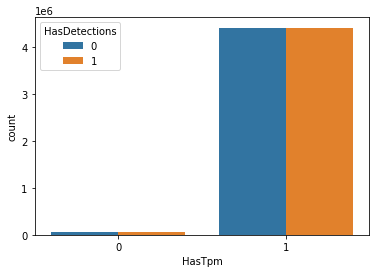

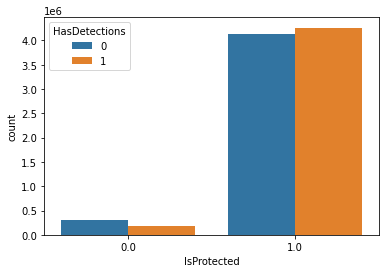

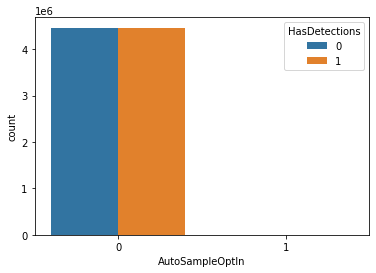

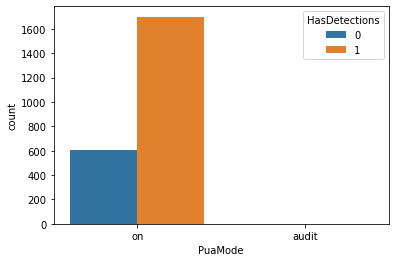

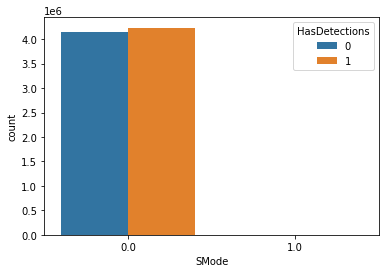

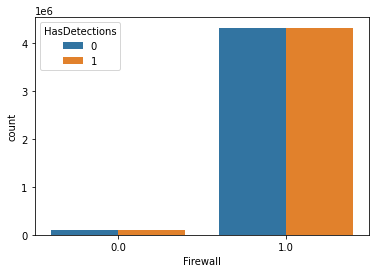

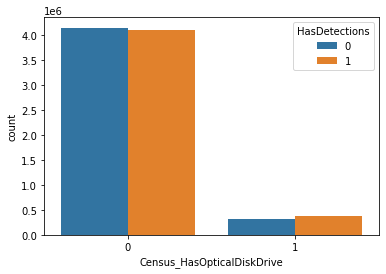

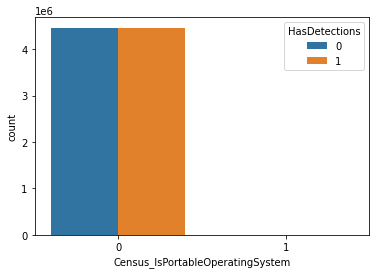

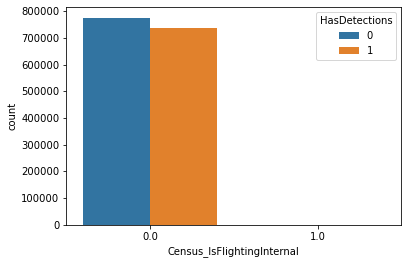

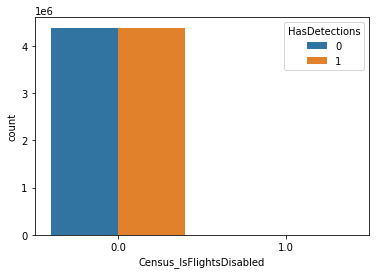

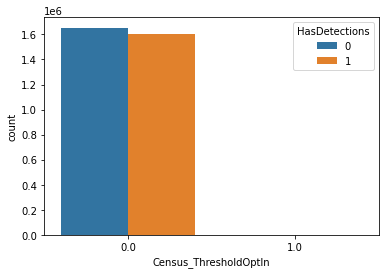

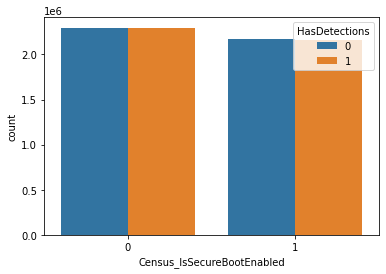

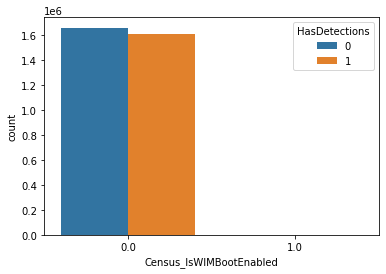

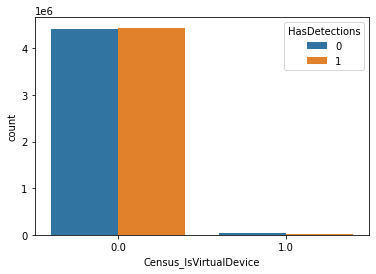

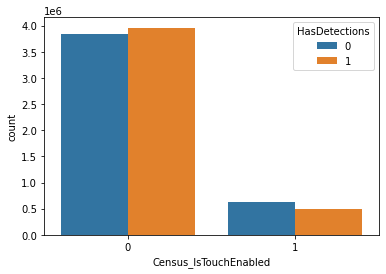

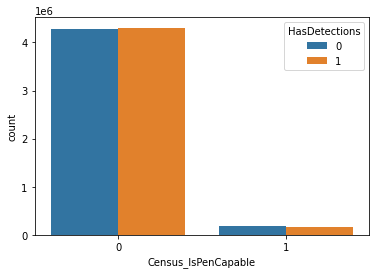

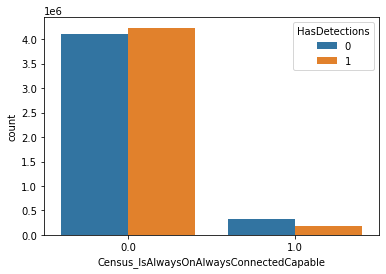

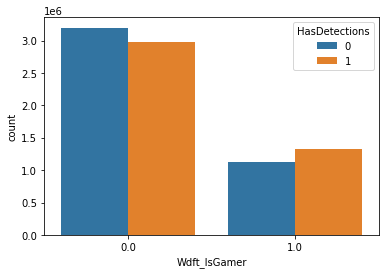

In [ ]:
# Look for bias in binary features?
for binary in bins:
    if binary != 'HasDetections':
        plt.figure()
        sns.countplot(data = malware, x = binary, hue = 'HasDetections')
        plt.show()

In [ ]:
# all but the infamous 'PuaMode' seem fine, yet another reason to get rid of it
# the dominances of major class are also visible here:

cond = 0.95
bin_dom = domination[(domination['domination of main class'] > cond) & (domination['Cardinality'] == 2)]
print(bin_dom)
print("\n")
print(f"There are {len(bins)} binary features, {len(bin_dom)} of them have the majority class in > {100*cond}% occurences")

                             Feature  domination of main class  Cardinality
5                             IsBeta                  0.999992            2
7                   IsSxsPassiveMode                  0.982666            2
12                            HasTpm                  0.987971            2
27                   AutoSampleOptIn                  0.999971            2
28                           PuaMode                  0.999134            2
29                             SMode                  0.999537            2
32                          Firewall                  0.978583            2
57  Census_IsPortableOperatingSystem                  0.999455            2
60        Census_IsFlightingInternal                  0.999986            2
61          Census_IsFlightsDisabled                  0.999990            2
63             Census_ThresholdOptIn                  0.999749            2
67           Census_IsWIMBootEnabled                  1.000000            2
68          

In [6]:
def entropy(series):
    pX = series.value_counts(normalize=True, dropna=False)
    return -np.sum(pX * np.log2(pX))

def condEntropy(df, X, Y):
    """Compute the conditional H(X|Y) in dataframe df
    Args:
        df: a dataframe
        X: the name of the conditioning columt
        Y: the name of the column whose entropy we wish to compute
    """
    pY = np.array(df[Y].value_counts(normalize=True, dropna=False))
    HXgivenY = np.array(df.groupby(Y, dropna=False).agg({X: entropy})).reshape(-1)
    return np.sum(pY * HXgivenY)

entropyTarget = entropy(malware['HasDetections'])
mutualInfos = {}
for column in malware:
    # column = 'OsBuildLab'
    if column != 'MachineIdentifier' and column != 'HasDetections':
        if dtypes[column] == 'category' and malware[column].isnull().values.any():
            malware[column] = malware[column].cat.add_categories("NaN")
            malware[column].fillna("NaN", inplace=True)       
        mi = entropyTarget - condEntropy(malware, 'HasDetections', column)
        mutualInfos[column] = mi
        print('I(target, {}) = {}'.format(column, mi))

I(target, ProductName) = 0.0006916109259441638
I(target, EngineVersion) = 0.03690229559271152
I(target, AppVersion) = 0.005881042053523022
I(target, AvSigVersion) = 0.07122619093543625
I(target, IsBeta) = 1.1407296218735041e-09
I(target, RtpStateBitfield) = 0.045886563660574864
I(target, IsSxsPassiveMode) = 0.000897450292263624
I(target, DefaultBrowsersIdentifier) = 0.02913662406314954
I(target, AVProductStatesIdentifier) = 0.9347473950337087
I(target, AVProductsInstalled) = 0.6992376446920274
I(target, AVProductsEnabled) = 0.06140354535274062
I(target, HasTpm) = 0.001794412603662754
I(target, CountryIdentifier) = 0.017327636257236212
I(target, CityIdentifier) = 0.3867765419534407
I(target, OrganizationIdentifier) = 0.019292751891751392
I(target, GeoNameIdentifier) = 0.05991530373204457
I(target, LocaleEnglishNameIdentifier) = 0.020786166898248193
I(target, Platform) = 0.0014510140563290808
I(target, Processor) = 0.8095083512675176
I(target, OsVer) = 3.0999927980057684e-05
I(target, Os

In [8]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [ ]:
import itertools

columns = malware.columns.values.tolist()
columns.remove('HasDetections')
columns.remove('MachineIdentifier')

featureMIs = {}
entropies = {}

for (var1, var2) in itertools.combinations(columns, 2):
    if var1 != var2:
        entropies[var1] = entropy(malware[var1])
        featureMIs[f"{var1},{var2}"] = entropies[var1] - condEntropy(malware, var1, var2)
        print(f'I({var1}, {var2}) = {featureMIs[f"{var1},{var2}"]}')
        with open('/content/gdrive/My Drive/Notebooks Colab/featureMIs.pickle', 'wb') as handle:
            pickle.dump(featureMIs, handle, protocol=pickle.HIGHEST_PROTOCOL)
        with open('/content/gdrive/My Drive/Notebooks Colab/entropies.pickle', 'wb') as handle:
            pickle.dump(entropies, handle, protocol=pickle.HIGHEST_PROTOCOL)